# CS5950/CS4950 Course Project

This project recaps and systematises work that has been done in the exercise notebooks: if you have worked through the notebooks, little extra work is required.  The aim of the project is to give you the experience of trying to develop a neural network classifier (or regressor), involving setting up a model, optimising the amount of regularisation, investigating its performance, and devising a new model. 

You should do your work in this notebook, filling in the sections below. To do the work, you may re-use code from ***any of the lab-session sheets provided so far***. (In fact, you should be able to do nearly the entire project using code taken from previous lab sessions.) 

Please complete this workbook and submit it on Moodle, with all outputs (numbers and graphs) visible and included. 

The deadline for this assignment is **Wednesday April 7th, 10am**

This project has **10%** of the marks of the course.

Please write your student number **here**:     
so that I have an identifier of which worksheet I am marking, to prevent any confusion! (I have to download your notebooks before marking them, so I don't want to accidentally give credit for your notebook to somebody else...) 

## Set up dataset

You may choose any of the datasets included with Pytorch, or used in the course so far (including, for example, the percolation data). (It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

A more interesting choice would be CIFAR-10

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

## Set up model 

Set up a Pytorch model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:    ***12 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [ ]:
# your code here (you can freely used and modify code from course lab-sheets throughout this project)
# importing cfar 10:
import torch
import torchvision
import torchvision.transforms as T
import torch.nn.functional as F
import numpy as np
# 3 channels
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
channels=3 #flattened images.
mean=[0.5]*channels
std=[0.5]*channels
batch_size=16

training_set_sizes=[500,1000,2000,4000,10000]
print("LOADING")
transform=T.Compose([T.ToTensor(), T.Normalize(mean,std),T.Lambda(lambda x: torch.flatten(x))])

import torch.nn as nn

class LinNet(nn.Module):
    def __init__(self):
        super(LinNet,self).__init__()
        num_f=32*32*3
        self.fc1=nn.Linear(num_f,100)
        self.fc2=nn.Linear(100,100)
        self.fc3=nn.Linear(100,len(classes))
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        return x


import torch.optim as optim


def train(net,test_size,decay=None):
    if decay:
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9,weight_decay=decay)
    else:
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    criterion = nn.CrossEntropyLoss()

    acc=[]
    av_acc=[]
    for idx,epoch in enumerate(range(5)):  # loop over the dataset multiple times
        print("RUNNING")
        running_loss = 0.0
        print(idx)
        for i, data in enumerate(trainloader, 0):
            if i>test_size:
                break
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            out_l=outputs.max(1)[1]
            corr=(out_l == labels).sum().item()/batch_size
            acc.append(corr)
            av_acc.append(np.sum(acc[max((0,len(acc)-100)):len(acc)])/min((len(acc),100)))
            # print statistics
            running_loss += loss.item()
            if i % 500 == 499:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    return acc,av_acc

Files already downloaded and verified
Files already downloaded and verified
====:  [500, 1000, 2000, 4000, 10000]
500
RUNNING
0
[1,   500] loss: 0.549
RUNNING
1
[2,   500] loss: 0.512
RUNNING
2
[3,   500] loss: 0.487
Finished Training
1000
RUNNING
0
[1,   500] loss: 0.566
[1,  1000] loss: 0.546
RUNNING
1
[2,   500] loss: 0.521
[2,  1000] loss: 0.503
RUNNING
2
[3,   500] loss: 0.474
[3,  1000] loss: 0.461
Finished Training
2000
RUNNING
0
[1,   500] loss: 0.557
[1,  1000] loss: 0.525
[1,  1500] loss: 0.516
[1,  2000] loss: 0.505
RUNNING
1
[2,   500] loss: 0.494
[2,  1000] loss: 0.485
[2,  1500] loss: 0.484
[2,  2000] loss: 0.474
RUNNING
2
[3,   500] loss: 0.471
[3,  1000] loss: 0.445
[3,  1500] loss: 0.437
[3,  2000] loss: 0.435
Finished Training
4000
RUNNING
0
[1,   500] loss: 0.551
[1,  1000] loss: 0.482
[1,  1500] loss: 0.452
[1,  2000] loss: 0.434
[1,  2500] loss: 0.425
[1,  3000] loss: 0.413
RUNNING
1
[2,   500] loss: 0.403
[2,  1000] loss: 0.396
[2,  1500] loss: 0.391
[2,  2000] lo

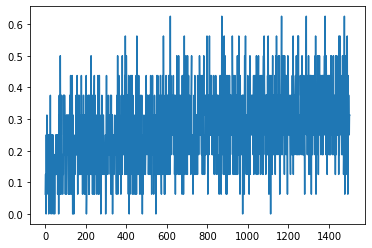

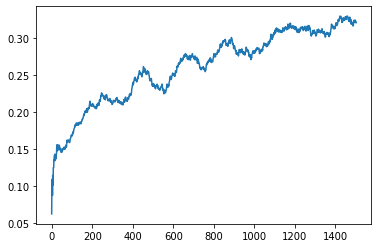

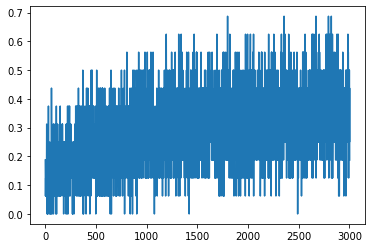

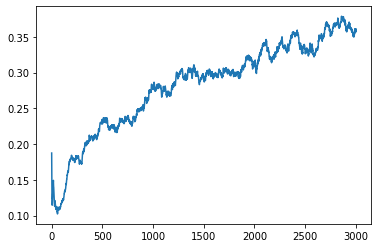

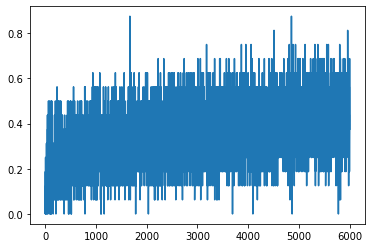

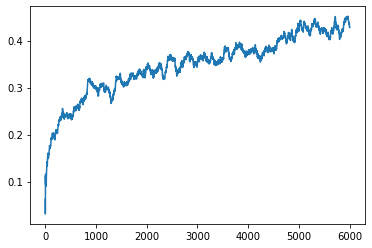

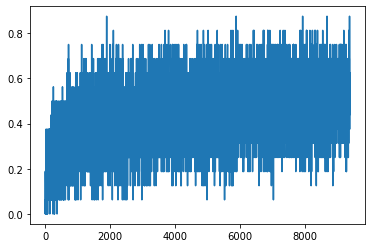

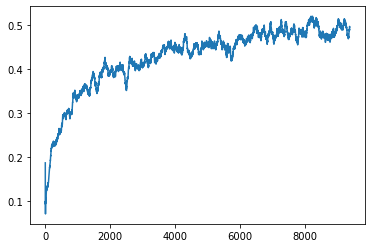

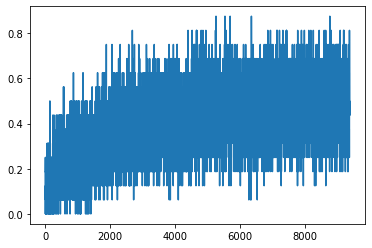

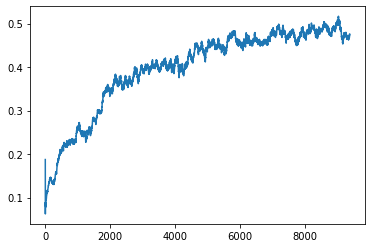

In [160]:
#=============== DO NOT RUN (LONGER) ==========
from matplotlib import pyplot as plt
cf10_train=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
classes = cf10_train.classes
trainloader = torch.utils.data.DataLoader(cf10_train, batch_size=batch_size, shuffle=True, num_workers=8)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=8)

print("====: ",training_set_sizes)
for v in training_set_sizes:
    net = LinNet().to(device)

    print(v)
    acc,av_acc=train(net,v)
    plt.plot(acc)
    plt.show()
    plt.plot(av_acc)
    plt.show()
    print('Finished Training')
    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)

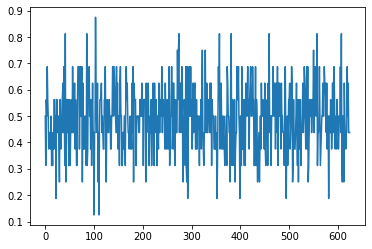

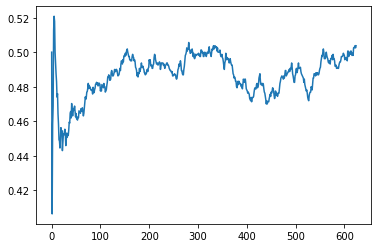

Accuracy of the network on the 10000 test images: 48 %
cpu


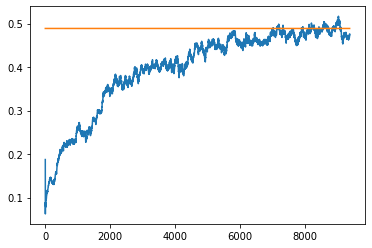

0.4888

In [161]:
import matplotlib.pyplot as plt
import numpy as np

#========================
def eval():
    net = LinNet()
    net.load_state_dict(torch.load(PATH))
    correct = 0
    total = 0
    acc_test=[]
    av_acc_test=[]

    with torch.no_grad():

        for data in testloader:
            images, labels = data
            outputs = net(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            corr=(predicted == labels).sum().item()
            correct += corr
            corr/=batch_size
            acc_test.append(corr)
            av_acc_test.append(np.sum(acc_test[max((0,len(acc_test)-100)):len(acc_test)])/min((len(acc_test),100)))
    plt.plot(acc_test)
    plt.show()
    plt.plot(av_acc_test)
    plt.show()
    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
    plt.plot(av_acc)
    plt.plot([correct / total]*len(av_acc))
    plt.show()
    print(device)
    return correct / total
eval()

### 2.  Regularisation experiment:  ***12 marks***

Now select a type of regularisation (which may be L2, or dropout) and train your initial model with different amounts of regularisation. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

RUNNING
0
[1,   500] loss: 0.557
[1,  1000] loss: 0.525
[1,  1500] loss: 0.507
[1,  2000] loss: 0.490
[1,  2500] loss: 0.458
[1,  3000] loss: 0.446
RUNNING
1
[2,   500] loss: 0.436
[2,  1000] loss: 0.428
[2,  1500] loss: 0.417
[2,  2000] loss: 0.420
[2,  2500] loss: 0.411
[2,  3000] loss: 0.416
RUNNING
2
[3,   500] loss: 0.399
[3,  1000] loss: 0.400
[3,  1500] loss: 0.395
[3,  2000] loss: 0.398
[3,  2500] loss: 0.399
[3,  3000] loss: 0.391
Finished Training


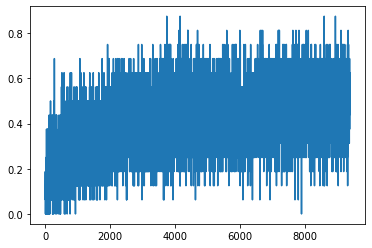

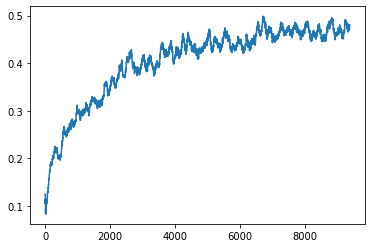

In [ ]:
reg_values=[0.0001,0.001,0.001,0.01]
reg_acc=[]
for w in reg_values:
    net = LinNet().to(device)

    acc,av_acc=train(net,10000,decay=w)
    plt.plot(acc)
    plt.show()
    plt.plot(av_acc)
    plt.show()
    print('Finished Training')
    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)
    reg_acc.append(eval())

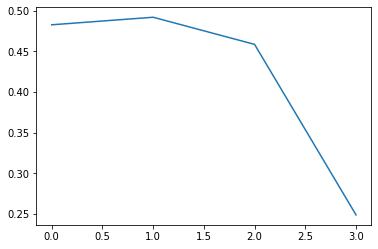

In [173]:
plt.plot(range(len(reg_values)),reg_acc)
plt.show()


### 3.  Learning curve experiment:  ***12 marks***

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [ ]:
# your code here

### 4. Second model:   *** 14 marks ***

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeat sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [ ]:
# your code here